<a href="https://colab.research.google.com/github/taquan17/YOLO-Facemask/blob/main/FaceMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1. Connect với Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Step 2. Tải mã nguồn của YOLO
!rm -rf darknet
%cd /content/gdrive/MyDrive/ColabNotebooks/19127251_19127245_YOLO
!git clone https://github.com/AlexeyAB/darknet
%cd /content/gdrive/MyDrive/ColabNotebooks/19127251_19127245_YOLO
!rm -rf data
!mkdir data

In [ ]:
#Step 3. Tải data format YOLO
%cd /content/gdrive/MyDrive/ColabNotebooks/19127251_19127245_YOLO/darknet/data
!unzip data.zip

In [ ]:
# Step 4. Tạo file yolo.names
%cd /content/gdrive/MyDrive/ColabNotebooks/19127251_19127245_YOLO/darknet
!echo "Face" > yolo.names
!echo "Face mask" >> yolo.names

In [ ]:
# Step 5. Tạo file train.txt và val.txt
%cd /content/gdrive/MyDrive/ColabNotebooks/19127251_19127245_YOLO/darknet

import glob2
import math  
import os
import numpy as np

files = []
for ext in ["*.png", "*.jpeg", "*.jpg"]:
  image_files = glob2.glob(os.path.join("data/data/", ext))
  files += image_files

nb_val = math.floor(len(files)*0.2)
rand_idx = np.random.randint(0, len(files), nb_val)

# Tạo file train.txt
with open("train.txt", "w") as f:
  for idx in np.arange(len(files)):
    if (os.path.exists(files[idx][:-3] + "txt")):
      f.write(files[idx]+'\n')

# Tạo file vali.txt
with open("val.txt", "w") as f:
  for idx in np.arange(len(files)):
    if (idx in rand_idx) and (os.path.exists(files[idx][:-3] + "txt")):
      f.write(files[idx]+'\n')

In [ ]:
# Step 6. Tạo file yolo.data
%cd /content/gdrive/MyDrive/ColabNotebooks/19127251_19127245_YOLO/darknet
!mkdir backup
!echo classes=2 > yolo.data
!echo train=train.txt >> yolo.data
!echo valid=val.txt >> yolo.data
!echo names=yolo.names >> yolo.data
!echo backup=backup >> yolo.data

In [ ]:
# Step 7. Make darknet
%cd /content/gdrive/MyDrive/ColabNotebooks/19127251_19127245_YOLO/darknet
!rm darknet
!make

In [ ]:
# Step 8. Download pretrain weight
%cd /content/gdrive/MyDrive/ColabNotebooks/19127251_19127245_YOLO/darknet
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
# Step 9. Train
%cd /content/gdrive/MyDrive/ColabNotebooks/19127251_19127245_YOLO/darknet
!./darknet detector train yolo.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show

In [ ]:
# Step 10. Train tiếp (Phải chạy)
!chmod +x ./darknet
%cd /content/gdrive/MyDrive/ColabNotebooks/19127251_19127245_YOLO/darknet
!./darknet detector train yolo.data cfg/yolov4-custom.cfg backup/yolov4-custom_last.weights -dont_show

In [ ]:
%cd /content/gdrive/MyDrive/ColabNotebooks/19127251_19127245_YOLO/darknet/cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

/content/gdrive/MyDrive/ColabNotebooks/19127251_19127245_YOLO/darknet/cfg
/content/gdrive/My Drive/ColabNotebooks/19127251_19127245_YOLO/darknet


In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  #%matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  return image

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

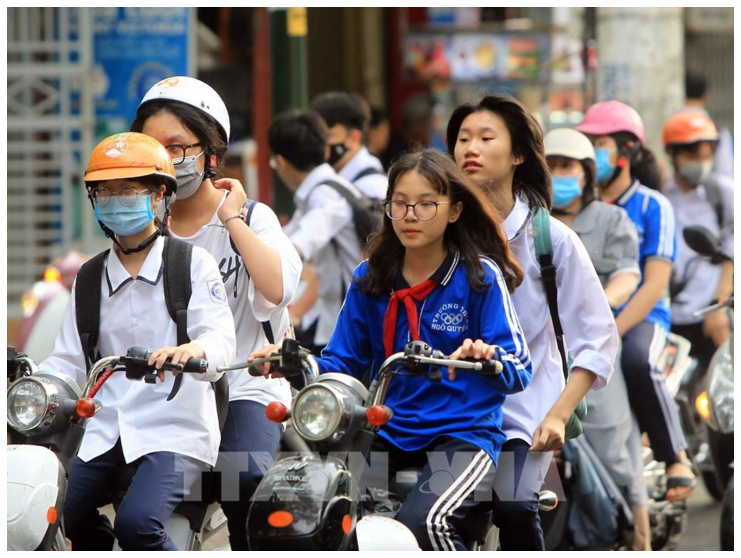

In [ ]:
image=imShow('/content/img2.jpeg')

In [ ]:
type(image)

numpy.ndarray

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/5

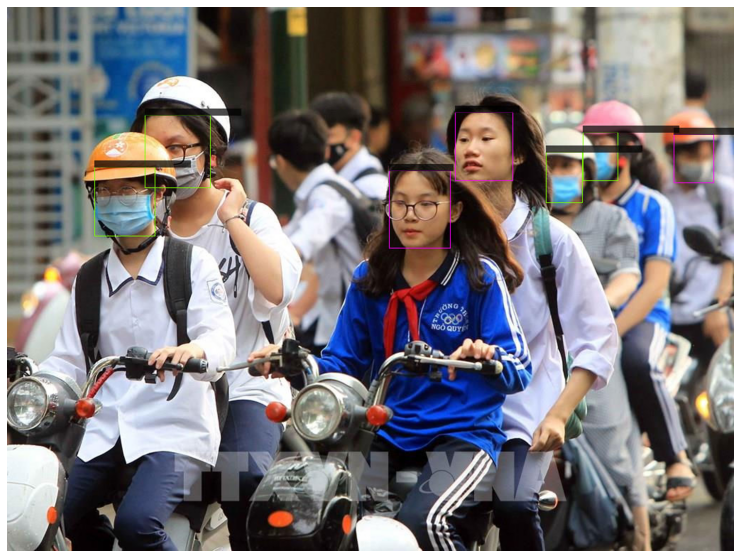

array([[[114, 111, 107],
        [109, 106, 102],
        [103, 102,  98],
        ...,
        [113, 145, 150],
        [111, 143, 148],
        [109, 141, 146]],

       [[113, 108, 105],
        [108, 105, 101],
        [104, 103,  99],
        ...,
        [113, 145, 150],
        [111, 143, 148],
        [109, 141, 146]],

       [[111, 106, 103],
        [107, 104, 100],
        [104, 103,  99],
        ...,
        [115, 145, 150],
        [111, 143, 148],
        [109, 141, 146]],

       ...,

       [[152, 157, 160],
        [151, 156, 157],
        [151, 156, 157],
        ...,
        [ 15,  13,  19],
        [ 16,  14,  20],
        [ 16,  14,  20]],

       [[154, 159, 162],
        [152, 157, 158],
        [151, 156, 157],
        ...,
        [ 15,  13,  19],
        [ 16,  14,  20],
        [ 16,  14,  20]],

       [[156, 161, 164],
        [154, 159, 160],
        [150, 155, 156],
        ...,
        [ 15,  13,  19],
        [ 15,  13,  19],
        [ 16,  14,  20]]

In [ ]:
!chmod +x ./darknet
!./darknet detector test yolo.data /content/gdrive/MyDrive/ColabNotebooks/19127251_19127245_YOLO/darknet/cfg/yolov4-custom.cfg  "/content/gdrive/MyDrive/ColabNotebooks/19127251_19127245_YOLO/darknet/backup/yolov4-custom_final.weights" /content/img2.jpeg -thresh 0.3 -dont_show
imShow('predictions.jpg')
